# Importing libraries and reading dataset

In [2]:
# Importing libraries

from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading dataset

df = pd.read_csv(r'C:\Users\User\Desktop\Week_8_Q&A_dataset - Sheet1.csv')

In [4]:
# Displaying first 5 rows

df.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [5]:
#Checking for null values

df.isnull().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

**Insight : There are no null values**

In [6]:
# Summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


**Insight : There are no missing values and there are 28 rows and 3 columns**

In [7]:
df.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


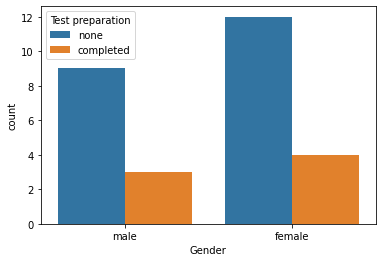

In [38]:
plt.figure()
fig=sns.countplot(x='Gender',data=df,hue='Test preparation')
plt.show()

**Insight : The number of students who are not completed the test preparation is more in bot males and females**

## **To check whether female and male students scored the same marks**

In [18]:
df.groupby("Gender").mean()

,Total Marks
Gender,
female,33.750000
male,30.416667


In [21]:
group=df.groupby("Gender")
m=group.get_group('male')
f=group.get_group('female')

In [24]:
m,f

(   Gender Test preparation  Total Marks
 0    male             none           14
 6    male             none           30
 8    male             none           18
 9    male             none           24
 10   male        completed           44
 11   male             none           23
 12   male        completed           43
 13   male             none           28
 18   male             none           47
 19   male             none           36
 20   male             none           14
 21   male        completed           44,
     Gender Test preparation  Total Marks
 1   female             none           28
 2   female             none           18
 3   female             none           48
 4   female             none           21
 5   female        completed           40
 7   female             none           12
 14  female             none           41
 15  female             none           13
 16  female        completed           48
 17  female             none           45
 22 

In [26]:
# Using t test

ttest,pval = ttest_ind(f["Total Marks"],m["Total Marks"],alternative="greater")
print("p-value",pval)
if pval <0.05:
  print("We reject null hypothesis, Mean Score of female students <= Mean Score of male students")
else:
  print("We accept null hypothesis, Mean Score of female students > Mean Score of male students")

p-value 0.24689111589803814
We accept null hypothesis, Mean Score of female students > Mean Score of male students


**Insight : Here we accept null hypothesis because the mean score of female students > mean score of male students**

## **To check whether test preparation helps the students**

In [27]:
df.groupby('Test preparation').mean()

,Total Marks
Test preparation,
completed,44.571429
none,28.238095


In [36]:
group=df.groupby("Test preparation")
not_compl=group.get_group('none')
compl=group.get_group('completed')

In [37]:
#Using t test

ttest,pval = ttest_ind(compl['Total Marks'],not_compl['Total Marks'],alternative='greater')
print("p-value",pval)
if pval <0.05:
  print("We reject null hypothesis, Mean Score of students who completed the test preparation <= Mean Score of students who did not complete the test preparation")
else:
  print("We accept null hypothesis, Mean Score of students who completed the test preparation > Mean Score of students who did not complete the test preparation")

p-value 0.0006335646228660053
We reject null hypothesis, Mean Score of students who completed the test preparation <= Mean Score of students who did not complete the test preparation


**Insight : Here we reject null hypothesis because the mean score of students who completed the test preparation <= mean score of students who did not complete the test preparation**